In [4]:
from collections import Counter
import pandas as pd

df = pd.read_csv('glassdoor_cleaned_text.csv')

# Join all cleaned reviews into one big string, then split into words
all_words = ' '.join(df['review_pros_cleaned']).split()

stop_keywords = ['team','company', 'job', 'work']
filtered_words = [word for word in all_words if word not in stop_keywords]

# Count frequency of each word
filtered_counts = Counter(filtered_words)

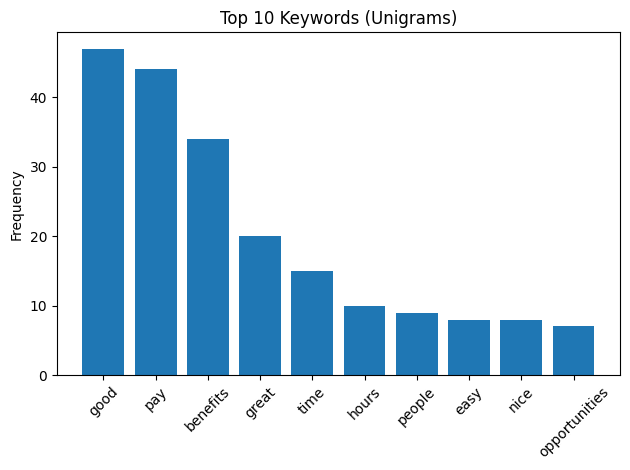

In [5]:
import matplotlib.pyplot as plt

most_common = filtered_counts.most_common(10)
words, counts = zip(*most_common)

plt.bar(words, counts)
plt.title("Top 10 Keywords (Unigrams)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [6]:
from nltk.util import ngrams

bigrams = list(ngrams(all_words, 2))
trigrams = list(ngrams(all_words, 3))

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)


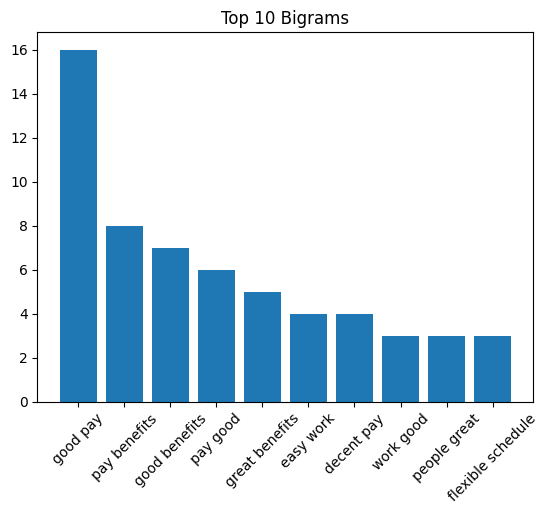

In [7]:
# For bigrams
common_bigrams = bigram_counts.most_common(10)
bg_labels = [' '.join(bg) for bg, count in common_bigrams]
bg_counts = [count for bg, count in common_bigrams]

plt.bar(bg_labels, bg_counts)
plt.title("Top 10 Bigrams")
plt.xticks(rotation=45)
plt.show()


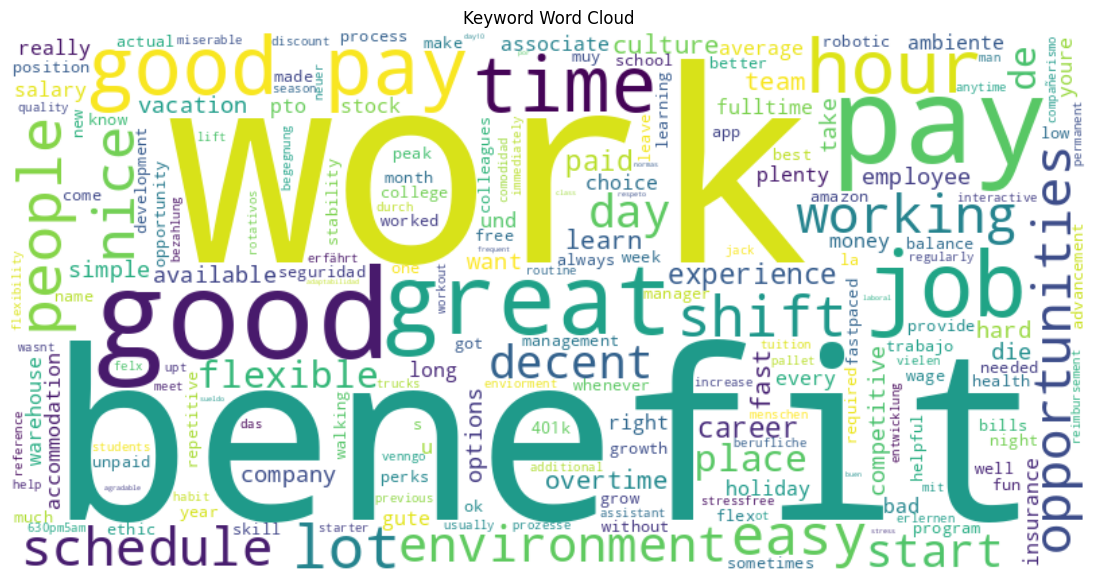

In [8]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Word Cloud")
plt.show()